In [1]:
import d4rl
# You must interrupt kernel here.
import rvs
from rvs import dataset as rvs_dataset

No module named 'flow'
Exception ignored on calling ctypes callback function: <function _handle_glfw_errors at 0x7ff9359779d0>
Traceback (most recent call last):
  File "/home/deadscholar/miniconda3/envs/final38/lib/python3.8/site-packages/glfw/__init__.py", line 657, in callback_wrapper
    @functools.wraps(func)
KeyboardInterrupt: 
No module named 'carla'
pybullet build time: May 20 2022 19:44:17
/home/deadscholar/miniconda3/envs/final38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload 
%autoreload 2
import h5py
import numpy as np
import matplotlib.pyplot as plt
import gym

In [3]:
# Create the environment
env = gym.make('halfcheetah-medium-v2')

# d4rl abides by the OpenAI gym interface
env.reset()
env.step(env.action_space.sample())

# Automatically download and return the dataset
dataset = env.get_dataset()
# d4rl.qlearning_dataset adds next_observations.
# dataset = d4rl.qlearning_dataset(env)
# Dataset is a dictionary of numpy arrays.
# ['observations', 'actions', 'next_observations', 'rewards', 'terminals']

print("\nobservations: shape", dataset['observations'].shape)
print(dataset['observations']) # An (N, dim_observation)-dimensional numpy array of observations


print("\nactions: shape", dataset['actions'].shape)
print(dataset['actions']) # An (N, dim_action)-dimensional numpy array of actions

print("\nrewards: shape", dataset['rewards'].shape)
print(dataset['rewards']) # An (N,)-dimensional numpy array of rewards

/home/deadscholar/miniconda3/envs/final38/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 12.94it/s]


observations: shape (1000000, 17)
[[ 1.98319145e-02 -8.95013139e-02 -3.19690630e-03 ...  1.13650791e-01
   6.84249178e-02 -1.38115823e-01]
 [-3.84860625e-03 -5.23943193e-02  8.30503274e-03 ...  4.50684071e+00
  -9.28855705e+00  4.73285961e+00]
 [-5.52984327e-02 -7.78502363e-05 -2.39528313e-01 ... -7.08116865e+00
  -1.40370679e+00  7.55240488e+00]
 ...
 [-8.43689293e-02  1.83390409e-01  2.12587118e-01 ... -6.52926207e+00
  -4.99970722e+00  1.48926890e+00]
 [-1.04697585e-01  2.26103649e-01 -1.84691548e-02 ...  1.65938358e+01
   9.28870201e+00  1.11639996e+01]
 [-1.07385121e-01  1.30561069e-01 -3.97258073e-01 ...  1.21558599e+01
   1.15490274e+01 -8.52056313e+00]]

actions: shape (1000000, 6)
[[-0.22293739 -0.7359478  -0.8599511   0.29579234 -0.8416547   0.43432042]
 [-0.72515714 -0.9237766  -0.9887563  -0.5074778  -0.931533    0.9786059 ]
 [ 0.85085297  0.4005884  -0.9951021  -0.9082174  -0.9951816   0.74173075]
 ...
 [-0.9761749  -0.98787767 -0.9983497   0.97892517  0.80819327  0.79452

In [4]:
import h5py
import numpy as np
import gym

# Create the environment
env = gym.make('halfcheetah-medium-replay-v2')

# d4rl abides by the OpenAI gym interface
env.reset()
env.step(env.action_space.sample())

dataset = env.get_dataset()
# dataset = d4rl.qlearning_dataset(env)

load datafile: 100%|████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 28.52it/s]


In [5]:
print(dataset.keys())

print("\nobservations: shape", dataset['observations'].shape)
print(dataset['observations']) # An (N, dim_observation)-dimensional numpy array of observations

print("\nactions: shape", dataset['actions'].shape)
print(dataset['actions']) # An (N, dim_action)-dimensional numpy array of actions

print("\nrewards: shape", dataset['rewards'].shape)
print(dataset['rewards']) # An (N,)-dimensional numpy array of rewards

print("\nalgorithms:", dataset['metadata/algorithm'])
print("\nmetadata/iteration:", dataset['metadata/iteration'])
print("\nterminals:", dataset['terminals'].sum())
print("\ntimeouts:", dataset['timeouts'].sum())

dict_keys(['actions', 'infos/action_log_probs', 'infos/qpos', 'infos/qvel', 'metadata/algorithm', 'metadata/iteration', 'next_observations', 'observations', 'rewards', 'terminals', 'timeouts'])

observations: shape (202000, 17)
[[-4.3362133e-02 -2.6833022e-03  6.5432638e-02 ...  1.0888433e-01
   8.8169552e-02  6.3931167e-02]
 [-3.7674177e-02  1.5365051e-02  2.1673881e-01 ... -8.2050276e+00
   2.6932850e+00 -4.4459348e+00]
 [-8.1146188e-02  1.5728043e-02  2.3461881e-01 ... -1.2342579e+00
  -4.2705555e+00 -3.4320550e+00]
 ...
 [-1.1022516e-01  1.4761375e-01 -1.5972993e-01 ...  1.3789013e+01
   5.8134689e+00  1.2093623e+01]
 [-1.2763156e-01  1.7924478e-02 -5.1608193e-01 ...  1.1960125e+01
   7.0111184e+00 -5.6281668e-01]
 [-1.5953253e-01 -1.9012982e-01 -5.3757519e-01 ... -1.8340943e+00
   1.5488399e+00  2.3770556e+00]]

actions: shape (202000, 6)
[[ 0.805719   -0.40144688  0.84037614 -0.84752977  0.1423154  -0.8422286 ]
 [ 0.17341618 -0.02360881  0.13152029 -0.2281776   0.1963803  -0.7379

In [6]:
import h5py
import numpy as np
import gym

# Create the environment
env = gym.make('halfcheetah-medium-v2')

# d4rl abides by the OpenAI gym interface
env.reset()
env.step(env.action_space.sample())

dataset = env.get_dataset()
# dataset = d4rl.qlearning_dataset(env)

load datafile: 100%|████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.53it/s]


In [7]:
print(dataset.keys())

print("\nobservations: shape", dataset['observations'].shape)
print(dataset['observations']) # An (N, dim_observation)-dimensional numpy array of observations

print("\nactions: shape", dataset['actions'].shape)
print(dataset['actions']) # An (N, dim_action)-dimensional numpy array of actions

print("\nrewards: shape", dataset['rewards'].shape)
print(dataset['rewards']) # An (N,)-dimensional numpy array of rewards

print("\nalgorithms:", dataset['metadata/algorithm'])
print("\nmetadata/iteration:", dataset['metadata/iteration'])
print("\nterminals:", dataset['terminals'].sum())
print("\ntimeouts:", dataset['timeouts'].sum())

dict_keys(['actions', 'infos/action_log_probs', 'infos/qpos', 'infos/qvel', 'metadata/algorithm', 'metadata/iteration', 'metadata/policy/fc0/bias', 'metadata/policy/fc0/weight', 'metadata/policy/fc1/bias', 'metadata/policy/fc1/weight', 'metadata/policy/last_fc/bias', 'metadata/policy/last_fc/weight', 'metadata/policy/last_fc_log_std/bias', 'metadata/policy/last_fc_log_std/weight', 'metadata/policy/nonlinearity', 'metadata/policy/output_distribution', 'next_observations', 'observations', 'rewards', 'terminals', 'timeouts'])

observations: shape (1000000, 17)
[[ 1.98319145e-02 -8.95013139e-02 -3.19690630e-03 ...  1.13650791e-01
   6.84249178e-02 -1.38115823e-01]
 [-3.84860625e-03 -5.23943193e-02  8.30503274e-03 ...  4.50684071e+00
  -9.28855705e+00  4.73285961e+00]
 [-5.52984327e-02 -7.78502363e-05 -2.39528313e-01 ... -7.08116865e+00
  -1.40370679e+00  7.55240488e+00]
 ...
 [-8.43689293e-02  1.83390409e-01  2.12587118e-01 ... -6.52926207e+00
  -4.99970722e+00  1.48926890e+00]
 [-1.046975

In [8]:
import h5py
import numpy as np
import gym

# Create the environment
env = gym.make('walker2d-medium-replay-v2')

# d4rl abides by the OpenAI gym interface
env.reset()
env.step(env.action_space.sample())

dataset = env.get_dataset()
# dataset = d4rl.qlearning_dataset(env)

load datafile: 100%|████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 19.86it/s]


In [9]:
print(dataset.keys())

print("\nobservations: shape", dataset['observations'].shape)
print(dataset['observations']) # An (N, dim_observation)-dimensional numpy array of observations

print("\nactions: shape", dataset['actions'].shape)
print(dataset['actions']) # An (N, dim_action)-dimensional numpy array of actions

print("\nrewards: shape", dataset['rewards'].shape)
print(dataset['rewards']) # An (N,)-dimensional numpy array of rewards
print("\nterminals:", dataset['terminals'].sum())
print("\ntimeouts:", dataset['timeouts'].sum())

dict_keys(['actions', 'infos/action_log_probs', 'infos/qpos', 'infos/qvel', 'metadata/algorithm', 'metadata/iteration', 'next_observations', 'observations', 'rewards', 'terminals', 'timeouts'])

observations: shape (302000, 17)
[[ 1.2499512e+00 -3.1047617e-03  4.5145904e-03 ... -4.2839502e-03
   4.2627393e-03  4.1866852e-03]
 [ 1.2484421e+00 -3.2501433e-02 -2.0006217e-02 ... -8.4798307e+00
   1.5060329e-01  1.0000000e+01]
 [ 1.2442532e+00 -1.0060811e-01 -9.1241300e-02 ... -1.0000000e+01
   2.2833151e-01  2.8302176e+00]
 ...
 [ 1.2546787e+00  1.3305090e-01  9.3687968e-03 ...  3.8471419e-01
   2.9312594e+00 -4.7992630e+00]
 [ 1.2549722e+00  1.3165553e-01  8.9572128e-03 ...  2.2384453e-01
   3.2754953e+00 -3.9655588e+00]
 [ 1.2550648e+00  1.3164835e-01  9.2208497e-03 ...  7.0185982e-02
   4.0838861e+00 -3.1423154e+00]]

actions: shape (302000, 6)
[[-0.61687475 -0.9633857   0.78323174 -0.8186183   0.25017694  0.64123476]
 [-0.94683784  0.5260007   0.95878744  0.62980753  0.5265829  -0.6128

In [10]:
env_names = ['hopper', 'halfcheetah', 'walker2d']
policy_names = ['random', 'medium-replay', 'medium', 'medium-expert']

dataset_dict = {}
rtg_dict = {}
for i, policy_name in enumerate(policy_names):
    for j, env_name in enumerate(env_names):
        name = '{e}-{p}-v2'.format(e=env_name, p=policy_name)
        print(name)
        env = gym.make(name)
        dataset = env.get_dataset()
        dataset_dict[name] = dataset
        rtg_dict[name] = rvs_dataset.reward_to_go(dataset)

hopper-random-v2


load datafile: 100%|██████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00,  9.10it/s]


halfcheetah-random-v2


load datafile: 100%|██████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  5.78it/s]


walker2d-random-v2


load datafile: 100%|██████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  5.94it/s]


hopper-medium-replay-v2


load datafile: 100%|████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 23.99it/s]


halfcheetah-medium-replay-v2


load datafile: 100%|████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 34.17it/s]


walker2d-medium-replay-v2


load datafile: 100%|████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 22.44it/s]


hopper-medium-v2


load datafile: 100%|████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 20.49it/s]


halfcheetah-medium-v2


load datafile: 100%|████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 15.44it/s]


walker2d-medium-v2


load datafile: 100%|████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 13.48it/s]


hopper-medium-expert-v2


load datafile: 100%|██████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  4.48it/s]


halfcheetah-medium-expert-v2


load datafile: 100%|██████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.85it/s]


walker2d-medium-expert-v2


load datafile: 100%|██████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.87it/s]


In [13]:
import pickle
with open('../datasets/rtg.pkl', 'wb') as fh:
    pickle.dump(rtg_dict, fh)

/tmp/ipykernel_9306/3281089062.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


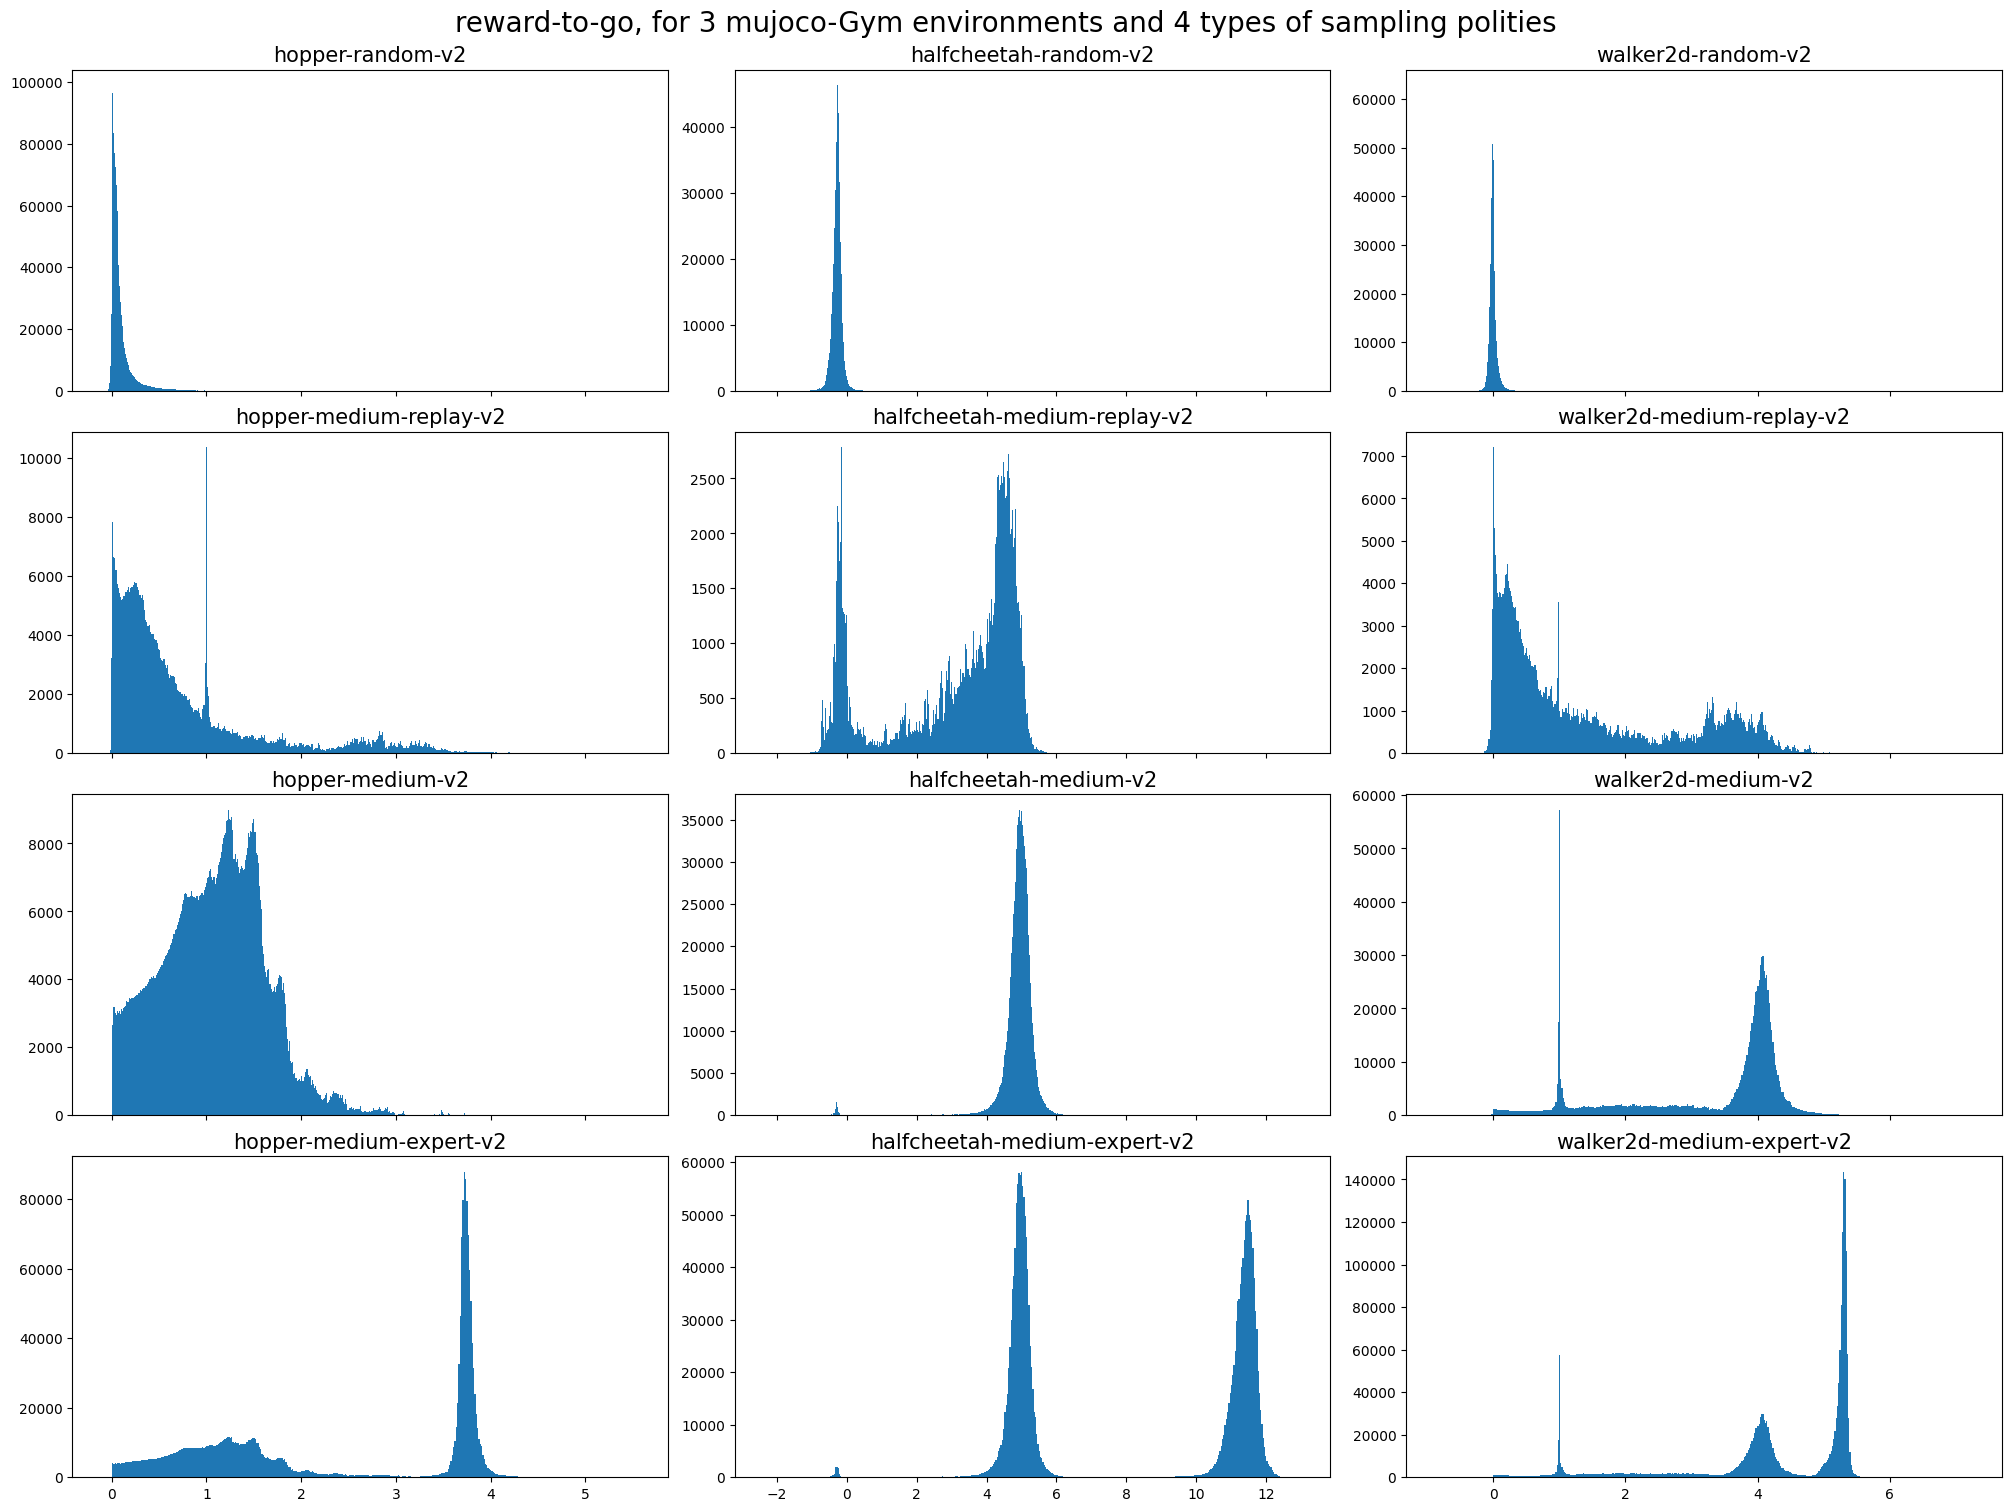

In [11]:
fig, axs = plt.subplots(len(policy_names), len(env_names), 
                        figsize=(20,15), sharex='col',
                        layout="constrained")

for i, policy_name in enumerate(policy_names):
    for j, env_name in enumerate(env_names):
        name = '{e}-{p}-v2'.format(e=env_name, p=policy_name)
        rtg = rtg_dict[name]
        axs[i, j].hist(rtg, bins=400)
        axs[i, j].set_title(name, fontsize=15)

fig.suptitle("reward-to-go, for 3 mujoco-Gym environments and 4 types of sampling polities", fontsize=20)
fig.show()
fig.savefig('reward_to_go.png')

In [14]:
## Now we save it to csv file for AutoGluon to use

# Export observation, action, reward-to-go
for name in dataset_dict.keys():
    dataset = dataset_dict[name]
    rtg = rtg_dict[name]
    print(name)
    data = np.hstack((dataset['observations'], dataset['actions'], rtg[:, np.newaxis]))
    ob_dim = dataset['observations'].shape[1]
    ac_dim = dataset['actions'].shape[1]
    header = ",".join(["ob%s" % n for n in range(ob_dim)] + ["ac%s" % n for n in range(ac_dim)] + ["rtg"])
    print(header)
    # export array to CSV file, using 4 decimal places
    np.savetxt("{name}.csv".format(name=name), data, delimiter=",", fmt="%.4f",
               header=header, comments="")

hopper-random-v2
ob0,ob1,ob2,ob3,ob4,ob5,ob6,ob7,ob8,ob9,ob10,ac0,ac1,ac2,rtg
halfcheetah-random-v2
ob0,ob1,ob2,ob3,ob4,ob5,ob6,ob7,ob8,ob9,ob10,ob11,ob12,ob13,ob14,ob15,ob16,ac0,ac1,ac2,ac3,ac4,ac5,rtg
walker2d-random-v2
ob0,ob1,ob2,ob3,ob4,ob5,ob6,ob7,ob8,ob9,ob10,ob11,ob12,ob13,ob14,ob15,ob16,ac0,ac1,ac2,ac3,ac4,ac5,rtg
hopper-medium-replay-v2
ob0,ob1,ob2,ob3,ob4,ob5,ob6,ob7,ob8,ob9,ob10,ac0,ac1,ac2,rtg
halfcheetah-medium-replay-v2
ob0,ob1,ob2,ob3,ob4,ob5,ob6,ob7,ob8,ob9,ob10,ob11,ob12,ob13,ob14,ob15,ob16,ac0,ac1,ac2,ac3,ac4,ac5,rtg
walker2d-medium-replay-v2
ob0,ob1,ob2,ob3,ob4,ob5,ob6,ob7,ob8,ob9,ob10,ob11,ob12,ob13,ob14,ob15,ob16,ac0,ac1,ac2,ac3,ac4,ac5,rtg
hopper-medium-v2
ob0,ob1,ob2,ob3,ob4,ob5,ob6,ob7,ob8,ob9,ob10,ac0,ac1,ac2,rtg
halfcheetah-medium-v2
ob0,ob1,ob2,ob3,ob4,ob5,ob6,ob7,ob8,ob9,ob10,ob11,ob12,ob13,ob14,ob15,ob16,ac0,ac1,ac2,ac3,ac4,ac5,rtg
walker2d-medium-v2
ob0,ob1,ob2,ob3,ob4,ob5,ob6,ob7,ob8,ob9,ob10,ob11,ob12,ob13,ob14,ob15,ob16,ac0,ac1,ac2,ac3,ac4,ac5,rtg
hopp